# Barplot of README page content

Import the libraries for README page analysis.

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import seaborn as sns

Import the CSV file for readme pages

In [2]:
readme_pages = pd.read_csv('data/readme_pages.csv', header=0)

Sum the number of elemenets across organizations

In [3]:
readme_pages_totals = readme_pages.sum()
print(readme_pages_totals)

organization_or_project_name             Darwin CoreEMLEcological Trait Data StandardMI...
getting_started                                                                       12.0
about_section                                                                         29.0
how_to_contribute                                                                     16.0
history                                                                                6.0
copyright_information                                                                 12.0
funding_and_acknowledgements                                                           7.0
visual_structure_of_repo                                                               7.0
recommended_citation                                                                  10.0
archived_version_and_upcoming_version                                                 11.0
resources                                                                              6.0

Remove the header since we will replace the header in the next step.

In [6]:
readme_new_labels = readme_pages_totals.drop("organization_or_project_name")
readme_new_labels.head()

getting_started          12.0
about_section            29.0
how_to_contribute        16.0
history                   6.0
copyright_information    12.0
dtype: object

Convert the series to a dataframe, and add in new header for plotting.

In [7]:
readme_pages_df = pd.DataFrame({'README_elements':readme_new_labels.index, 'count':readme_new_labels.values})
readme_pages_df

,README_elements,count
0,getting_started,12.0
1,about_section,29.0
2,how_to_contribute,16.0
3,history,6.0
4,copyright_information,12.0
5,funding_and_acknowledgements,7.0
6,visual_structure_of_repo,7.0
7,recommended_citation,10.0
8,archived_version_and_upcoming_version,11.0
9,resources,6.0


Calculate the percent of each element compared to overall number of organizations.

In [11]:
readme_pages_df['percent'] = (readme_pages_df['count'] / (len(readme_pages.index))) * 100
print(readme_pages_df)

                         README_elements count percent
0                        getting_started  12.0    37.5
1                          about_section  29.0  90.625
2                      how_to_contribute  16.0    50.0
3                                history   6.0   18.75
4                  copyright_information  12.0    37.5
5           funding_and_acknowledgements   7.0  21.875
6               visual_structure_of_repo   7.0  21.875
7                   recommended_citation  10.0   31.25
8  archived_version_and_upcoming_version  11.0  34.375
9                              resources   6.0   18.75


Arrange dataframe into descending order for plotting.

In [9]:
result = readme_pages_df.sort_values('percent', ascending=False)
print(result)

                         README_elements count percent
1                          about_section  29.0  90.625
2                      how_to_contribute  16.0    50.0
0                        getting_started  12.0    37.5
4                  copyright_information  12.0    37.5
8  archived_version_and_upcoming_version  11.0  34.375
7                   recommended_citation  10.0   31.25
5           funding_and_acknowledgements   7.0  21.875
6               visual_structure_of_repo   7.0  21.875
3                                history   6.0   18.75
9                              resources   6.0   18.75


Make plot using `seaborn` library

(0.0, 100.0)

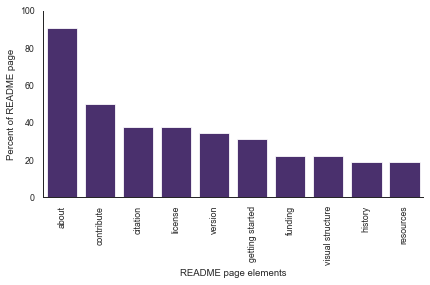

In [10]:
sns.set_style("white")
sns.set_context("paper")
readme_barplot = sns.barplot(x="README_elements", 
                                y = "percent", 
                                data = readme_pages_df, 
                                color="#482677FF",
                               order = result['README_elements'])
readme_barplot.set(xlabel = "README page elements", 
                      ylabel = "Percent of README page")
readme_barplot.set_xticklabels(readme_barplot.get_xticklabels(), 
                                  rotation=90)
readme_barplot.set_xticklabels(['about','contribute','citation','license','version','getting started','funding','visual structure','history','resources'])
sns.despine(top=True)
plt.tight_layout(h_pad=2)
plt.ylim(0,100)